
# HANA Python ML : Recognizing hand-written digits


An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

This example is commented in the
`tutorial section of the user manual <introduction>`.




In [1]:
%matplotlib inline

In [2]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

Automatically created module for IPython interactive environment


Converting this example to HANA Python ML.
Original example can be found at [Recognizing hand-written digits](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)

In [3]:
# Author: Andrew Lunde <andrew dot lunde at sap dot com>
# License: 

Use the following to get the VCAP_SERVICES environment variable from xs/cf

```
xs env python-ml.db --export-json /dev/stdout 2>/dev/null | tail -n +5 | jq -r '.VCAP_SERVICES'
```

Cut the contents from the console and paste the here between the ''' chars.

In [4]:
vcapsvcs_str = '''
{
    "xsuaa" : [ {
      "name" : "python-ml-uaa",
      "label" : "xsuaa",
      "tags" : [ "xsuaa" ],
      "plan" : "default",
      "credentials" : {
        "tenantmode" : "dedicated",
        "clientid" : "sb-na-193ff3e7-922d-4068-969d-1b0f53aa7951",
        "verificationkey" : "-----BEGIN PUBLIC KEY-----MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAsYtDBo6f+SHpxVJ+2fwnIVdSzrbuoP6lFYRfZ29soZ0XSw51IHoa3ew4t8Ep7d15ua3r7ZZCf3wteGkSO+0QdcJwak0lAEygdD9uVlANLZmu9jZMKmOcn/65XDyn++YJWQt2o5AS6Kz4XLQGSOVReQbfchcMiqJhebCtEAFTb0oYtxYjGY4dWqGnJFpv2iL/oRs304JGogaxz7cUzQiUkLDK6/elsbWAtvu+H6R1vitt/EEsHkYh3+/V5/Rf3+G16IKxIFQxIwZOR5pk1CMll1inm/Ya7Z2n5nrxs5vglyuV0oThqWxKEtNQGPG6990hOnHoMYu8JXPshL07HreIkwIDAQAB-----END PUBLIC KEY-----",
        "xsappname" : "na-193ff3e7-922d-4068-969d-1b0f53aa7951",
        "identityzone" : "uaa",
        "identityzoneid" : "uaa",
        "clientsecret" : "m63m25atIbQs27NnuOFoqeKqDhGxTxjvQW4m52hfSxDlJPuBrQQSaZQ6QPqpyE0jtzLorajiqTv0\nVTCiddMUMw==",
        "url" : "https://hxehost:39032/uaa-security"
      }
    } ],
    "hana" : [ {
      "name" : "python-ml-hdi",
      "label" : "hana",
      "tags" : [ "hana", "database", "relational" ],
      "plan" : "hdi-shared",
      "credentials" : {
        "schema" : "E4BA032547384A4C82CC3460445F2AA2",
        "hdi_password" : "Sj2Ueol9Gk7BsgH3V1atnjjuuQnrBv97drkIJJwxGb_n9.lGp_ZiWMpzIBxD7skg95GF1I5FMkYtGiNKc52HUn2pevT2tkzvjVJZOENG_6oS6eou8MDbSIE.ob8Ki9Pw",
        "password" : "Sb9x_0U165lN0_YkomXdAI.Qp1P8nauMYrE_mOOK-Xrvc5CPd.LXFH-on3xvW.esSf3SkAJh97B-gSizdght9xnGKTI28G0nEYoJt-N4j12RBqXh0LYoHQBf7aSSXZEl",
        "driver" : "com.sap.db.jdbc.Driver",
        "port" : "39013",
        "host" : "hxehost",
        "db_hosts" : [ {
          "port" : 39013,
          "host" : "hxehost"
        } ],
        "hdi_user" : "E4BA032547384A4C82CC3460445F2AA2_7E8FB15BT3WE2DB4LGIQ8315K_DT",
        "user" : "E4BA032547384A4C82CC3460445F2AA2_BHLD7OT0V73FGWXWR6IDK0ZDQ_RT",
        "url" : "jdbc:sap://hxehost:39013/?currentschema=E4BA032547384A4C82CC3460445F2AA2"
      }
    } ]
  }
'''

Collapse the whitespace of the VCAP_SERVICES json for easier parsing.

In [5]:
import string
vcapsvcs_str = vcapsvcs_str.translate( { ord(c):None for c in ' \n\t\r' } )

In [6]:
#Uncomment to check on things.
print(vcapsvcs_str)

{"xsuaa":[{"name":"python-ml-uaa","label":"xsuaa","tags":["xsuaa"],"plan":"default","credentials":{"tenantmode":"dedicated","clientid":"sb-na-193ff3e7-922d-4068-969d-1b0f53aa7951","verificationkey":"-----BEGINPUBLICKEY-----MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAsYtDBo6f+SHpxVJ+2fwnIVdSzrbuoP6lFYRfZ29soZ0XSw51IHoa3ew4t8Ep7d15ua3r7ZZCf3wteGkSO+0QdcJwak0lAEygdD9uVlANLZmu9jZMKmOcn/65XDyn++YJWQt2o5AS6Kz4XLQGSOVReQbfchcMiqJhebCtEAFTb0oYtxYjGY4dWqGnJFpv2iL/oRs304JGogaxz7cUzQiUkLDK6/elsbWAtvu+H6R1vitt/EEsHkYh3+/V5/Rf3+G16IKxIFQxIwZOR5pk1CMll1inm/Ya7Z2n5nrxs5vglyuV0oThqWxKEtNQGPG6990hOnHoMYu8JXPshL07HreIkwIDAQAB-----ENDPUBLICKEY-----","xsappname":"na-193ff3e7-922d-4068-969d-1b0f53aa7951","identityzone":"uaa","identityzoneid":"uaa","clientsecret":"m63m25atIbQs27NnuOFoqeKqDhGxTxjvQW4m52hfSxDlJPuBrQQSaZQ6QPqpyE0jtzLorajiqTv0VTCiddMUMw==","url":"https://hxehost:39032/uaa-security"}}],"hana":[{"name":"python-ml-hdi","label":"hana","tags":["hana","database","relational"],"plan":"hdi-shared","cre

Inject the contents of VCAP_SERVICES into the environment of this Jupyter Notebook

Note: In a deployed XSA or CF app, this would have been accomplished by the deployer and bindings.

In [7]:
import os
os.environ['VCAP_SERVICES'] = vcapsvcs_str

Now using the SAP Python libs, pull out the hana section.

In [8]:
from cfenv import AppEnv
env = AppEnv()
hana = env.get_service(label='hana')

Now read the details out of the scructure into individual variables for convenience.

In [9]:
schema = hana.credentials['schema']
host = hana.credentials['host']
port = hana.credentials['port']
user = hana.credentials['user']
password = hana.credentials['password']

Spit the values out just to be sure they make sense.

Keep in mind these are the HDI container credentials automatically generated by the system.

In [10]:
output = "Key VCAP_SVCS values.\n\n"
output += 'host: ' + host + '\n'
output += 'port: ' + port + '\n'
output += 'schema: ' + schema + '\n'
output += 'user: ' + user + '\n'
output += 'pass: ' + password + '\n'
print(output)

Key VCAP_SVCS values.

host: hxehost
port: 39013
schema: E4BA032547384A4C82CC3460445F2AA2
user: E4BA032547384A4C82CC3460445F2AA2_BHLD7OT0V73FGWXWR6IDK0ZDQ_RT
pass: Sb9x_0U165lN0_YkomXdAI.Qp1P8nauMYrE_mOOK-Xrvc5CPd.LXFH-on3xvW.esSf3SkAJh97B-gSizdght9xnGKTI28G0nEYoJt-N4j12RBqXh0LYoHQBf7aSSXZEl



Taken from Doc: [End-to-End Example: Using the Python Client API for ML](https://help.sap.com/http.svc/rc/3f0dbe754b194c42a6bf3405697b711f/2.0.03/en-US/html/hana_ml.html#end-to-end-example-using-the-python-client-api-for-ml)


#Step 1: Import the Python Client API Library and Dataframe Library
```
from hana_ml import dataframe
```

In [75]:
from hana_ml import dataframe

#Step 2: Instantiate the Connection Object (conn)
```
conn = dataframe.ConnectionContext('<address>', <port>, '<user>','<password>')
```

In [76]:
hcc = dataframe.ConnectionContext(host, int(port), user, password)

#Step 3: Create the HANA Dataframe (df_fit) and Point to the
#"DATA_TBL_RFT" Table.
```
df_fit = conn.table("DATA_TBL_RFT")
```

In [77]:
hdf = (hcc.table('mta_python_ml.db.data::digits.number', schema=schema))

#Step 4: Inspect the Data
```
df_fit.head(4).collect()
```
Note that the collect method transforms the HANA DataFrame to a Pandas DataFrame.

In [78]:
hdf.head(4).collect()

,numberId,image.r1.c1,image.r1.c2,image.r1.c3,image.r1.c4,image.r1.c5,image.r1.c6,image.r1.c7,image.r1.c8,image.r2.c1,...,image.r7.c8,image.r8.c1,image.r8.c2,image.r8.c3,image.r8.c4,image.r8.c5,image.r8.c6,image.r8.c7,image.r8.c8,target
0,2,0,0,0,12,13,5,0,0,0,...,0,0,0,0,11,16,10,0,0,1
1,3,0,0,0,4,15,12,0,0,0,...,0,0,0,0,3,11,16,9,0,2
2,4,0,0,7,15,13,1,0,0,0,...,0,0,0,7,13,13,9,0,0,3
3,5,0,0,0,1,11,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


If we want the raw image data(one per row) without the key(numberId) and target fields, then exclude them.

In [79]:
hdf.head(4).drop(["numberId","target"]).collect()

,image.r1.c1,image.r1.c2,image.r1.c3,image.r1.c4,image.r1.c5,image.r1.c6,image.r1.c7,image.r1.c8,image.r2.c1,image.r2.c2,...,image.r7.c7,image.r7.c8,image.r8.c1,image.r8.c2,image.r8.c3,image.r8.c4,image.r8.c5,image.r8.c6,image.r8.c7,image.r8.c8
0,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,0,11,16,10,0,0
1,0,0,0,4,15,12,0,0,0,0,...,5,0,0,0,0,3,11,16,9,0
2,0,0,7,15,13,1,0,0,0,8,...,9,0,0,0,7,13,13,9,0,0
3,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,0,2,16,4,0,0


Tell the matplotlib to place it's output inline with the other notebook output.

In [80]:
%matplotlib inline

Import the libs we'll need.

In [81]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Let's plot out the first(zeroth) digit to prove that we are getting it from the HANA DB.

In [82]:
idx=0;

In [83]:
#Set the upper left pixel to 16(black) to show that we can manipulate the data
#UPDATE "mta_python_ml.db.data::digits.number" SET "image.r1.c1" = 16 WHERE "numberId" = 1

Create a "where" clause in order to retrieve just one record.

In [84]:
where = '"numberId" = ' + str(idx+1)

Create a pandas DataFrame by selecting a single row without the "numberId","target" columns.

# Note that once you bring the data into a pandas DataFrame, you have brought it into the application layer.  If you continue to work with it or derive things from it and work with them, you are wholly in the application layer and will need the memory resources to perform the operations.

# Ideally you will want to use the hana_ml functions instead of the sklearn functions so that the data remains in the DB layer and is not transferred to the application layer.

In [85]:
pdfimg = hdf.head(1).filter(where).drop(["numberId","target"]).collect()

Create a pandas DataFrame by selecting just the "target" column.

In [86]:
pdfval = hdf.head(1).filter(where).select(["target"]).collect()

The result is a 2 dimentional array, grab the upper-left(only) value

In [87]:
target = pdfval.iat[0,0]

In [88]:
#If you're ever unsure what is returned, check it's type.
#print(type(pdfval.iat[0,0]))

Since the data is in one sequence of 64 integers, convert it to an 8x8 2-dimentional array

In [89]:
img = np.reshape(pdfimg.values, (-1, 8)) # Convert 1X64 to 8x8

Print out it's values in a grid.

In [90]:
print(img)

[[16  0  5 13  9  1  0  0]
 [ 0  0 13 15 10 15  5  0]
 [ 0  3 15  2  0 11  8  0]
 [ 0  4 12  0  0  8  8  0]
 [ 0  5  8  0  0  9  8  0]
 [ 0  4 11  0  1 12  7  0]
 [ 0  2 14  5 10 12  0  0]
 [ 0  0  6 13 10  0  0  0]]


Now display it as a bitmap by using the mtplotlib library.

Notice the upper-left dot we set before.

Text(0.5, 1.0, 'Training: 0')

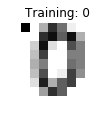

In [91]:
plt.subplot(2, 4, 1 + 1)
plt.axis('off')
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Training: %i' % target)

In [92]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

In [93]:
# Import datasets
#from sklearn import datasets

In [94]:
# The digits dataset
#digits = datasets.load_digits()
#print(type(digits))

In [95]:
pdfimg = hdf.drop(["numberId","target"]).collect()
print(type(pdfimg))

<class 'pandas.core.frame.DataFrame'>


In [96]:
#digits.images

In [97]:
#len(digits.images)

In [98]:
len(pdfimg.values)

1797

In [99]:
#digits.images.shape

In [100]:
pdfimg.values.shape

(1797, 64)

In [101]:
# Import classifiers and performance metrics
from sklearn import svm, metrics

In [102]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
#n_samples = len(digits.images)
#data = digits.images.reshape((n_samples, -1))

In [103]:
#n_samples

In [104]:
#data.shape

In [105]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(pdfimg.values)
data = pdfimg.values.reshape((n_samples, -1))

In [106]:
n_samples

1797

In [107]:
data.shape

(1797, 64)

In [108]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)


In [109]:
#digits.target

In [110]:
#digits.target.shape

In [111]:
#len(digits.target)

In [112]:
pdfval = hdf.select(["target"]).collect()
print(type(pdfval))

<class 'pandas.core.frame.DataFrame'>


In [113]:
pdfval.values.shape

(1797, 1)

In [114]:
target = pdfval.values.reshape((-1))

In [115]:
target

array([1, 2, 3, ..., 9, 8, 0])

In [116]:
target.shape

(1797,)

In [117]:
len(target)

1797

In [118]:
data = pdfimg.values.reshape((-1, 64))

In [119]:
data.shape

(1797, 64)

In [120]:
# We learn the digits on the first half of the digits

In [121]:
#classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

In [122]:
import sys

In [123]:
import time

In [124]:
start_time = time.time()
classifier.fit(data[:n_samples // 2], target[:n_samples // 2])
elapsed = 'Fitting Time: {} seconds'.format(time.time() - start_time)

In [125]:
print(elapsed)

Fitting Time: 0.06307101249694824 seconds


In [126]:
# Now predict the value of the digit on the second half:
#expected = digits.target[n_samples // 2:]
expected = target[n_samples // 2:]
start_time = time.time()
predicted = classifier.predict(data[n_samples // 2:])
elapsed = 'Classify Time: {} seconds'.format(time.time() - start_time)
print("Classification report for classifier %s:\n\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        87
           9       0.93      0.98      0.95        92

   micro avg       0.97      0.97      0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97

In [127]:
print(elapsed)

Classify Time: 0.044019222259521484 seconds


In [128]:
#digits.images.shape

In [129]:
data.shape

(1797, 64)

In [130]:
data = pdfimg.values.reshape((-1, 8, 8))

In [131]:
data.shape

(1797, 8, 8)

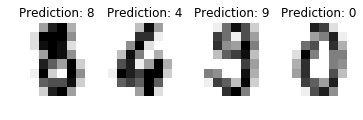

In [132]:
#images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
images_and_predictions = list(zip(data[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()